Import required libraries

In [525]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Set the option to display all rows
pd.set_option('display.max_rows', None)

Load our datasets

In [526]:
# Get our file path for the .csv files
file_paths = [f for f in os.listdir("./Dataset/") if f.endswith('.csv')]

# Define list for our data frames
li = []

# Loop through our file paths and read the .csv files into a data frame
for filename in file_paths:
    filename = "./Dataset/" + filename
    
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

# Concatenate our data frames into one central data frame
match_df = pd.concat(li, axis=0, ignore_index=True)

# Have a look at our data frame
match_df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,Time,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,11/08/2017,Arsenal,Leicester,4,3,H,2,2,D,M Dean,27,6,10,3,9,12,9,4,0,1,0,0,1.53,4.5,6.50,1.50,4.60,6.75,1.47,4.5,6.50,1.44,4.40,6.50,1.53,4.55,6.85,1.53,4.2,6.00,1.53,4.50,6.50,41.0,1.55,1.51,4.60,4.43,6.89,6.44,37.0,1.65,1.61,2.43,2.32,21.0,-1.00,1.91,1.85,2.10,2.02,1.49,4.73,7.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,12/08/2017,Brighton,Man City,0,2,A,0,0,D,M Oliver,6,14,2,4,6,9,3,10,0,2,0,0,11.00,5.5,1.33,11.00,5.25,1.30,8.00,5.3,1.35,10.00,5.00,1.30,10.95,5.55,1.34,10.00,4.8,1.33,10.00,5.50,1.33,40.0,11.50,10.10,5.60,5.25,1.36,1.32,35.0,1.70,1.63,2.40,2.27,20.0,1.50,1.95,1.91,2.01,1.96,11.75,6.15,1.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,12/08/2017,Chelsea,Burnley,2,3,A,0,3,A,C Pawson,19,10,6,5,16,11,8,5,3,3,2,0,1.25,6.5,15.00,1.22,6.50,12.50,1.22,6.2,13.50,1.25,5.75,15.00,1.26,6.30,15.25,1.25,5.5,13.00,1.25,6.25,15.00,41.0,1.27,1.24,6.55,6.06,15.50,13.67,36.0,1.71,1.66,2.33,2.23,20.0,-1.75,2.03,1.97,1.95,1.90,1.33,5.40,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,12/08/2017,Crystal Palace,Huddersfield,0,3,A,0,2,A,J Moss,14,8,4,6,7,19,12,9,1,3,0,0,1.83,3.6,5.00,1.80,3.50,4.75,1.85,3.5,4.30,1.80,3.40,4.60,1.83,3.58,5.11,1.80,3.3,5.00,1.83,3.60,5.00,41.0,1.86,1.81,3.65,3.50,5.11,4.82,36.0,2.19,2.11,1.79,1.72,18.0,-0.75,2.10,2.05,1.86,1.83,1.79,3.56,5.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,12/08/2017,Everton,Stoke,1,0,H,1,0,H,N Swarbrick,9,9,4,1,13,10,6,7,1,1,0,0,1.70,3.8,5.75,1.70,3.60,5.50,1.70,3.7,5.00,1.67,3.60,5.25,1.70,3.83,5.81,1.70,3.5,5.50,1.70,3.80,5.75,40.0,1.71,1.69,3.85,3.69,6.00,5.50,35.0,2.17,2.08,1.80,1.76,19.0,-0.75,1.94,1.90,2.01,1.98,1.82,3.49,5.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [527]:
# Get our team overall ratings by season
team_overall_ratings_df = pd.read_csv("./Dataset/seasonal_ratings/seasonal_team_rating.csv", index_col=None, header=0)

# Have a look at our data frame
team_overall_ratings_df.head()

,Season,Team,Rating
0,2022-2023,Man City,85
1,2022-2023,Liverpool,84
2,2022-2023,Arsenal,82
3,2022-2023,Chelsea,82
4,2022-2023,Man United,82


Re-format dataset structure / namings etc. and join both datasets together

In [528]:
# Drop the "Div" column as this is just indicates what football division the data is for
# not relevant for our analysis as we already know it is looking at the Premier League
match_df = match_df.drop(["Div"], axis=1)

In [529]:
# Add season column to see what season the match was played in

# Convert Date column from object to datetime
match_df["Date"] = pd.to_datetime(match_df["Date"], format='%d/%m/%Y')

# Define the date ranges for each season from 2017/18 to 2022/23
seasons = {
    '2017-2018': ('2017-08-11', '2018-05-13'),
    '2018-2019': ('2018-08-10', '2019-05-12'),
    '2019-2020': ('2019-08-09', '2020-07-26'),
    '2020-2021': ('2020-09-12', '2021-05-23'),
    '2021-2022': ('2021-08-13', '2022-05-22'),
    '2022-2023': ('2022-08-05', '2023-05-28')
}

# Define a function to get the season given a date
def get_season(date):
    
    for season, (start_date, end_date) in seasons.items():
        if pd.to_datetime(start_date) <= date <= pd.to_datetime(end_date):
            return season
        
    return 'Unknown'  # or whatever you want to return when the date doesn't fall into any of the defined seasons

match_df["Season"] = match_df["Date"].apply(get_season)

In [530]:
# Check the seasons have been added correctly by checking each season has the same number of matches (380)
match_df["Season"].value_counts()

Season
2017-2018    380
2018-2019    380
2019-2020    380
2020-2021    380
2021-2022    380
2022-2023    380
Name: count, dtype: int64

In [531]:
# Add the away and home team overall ratings to the match data frame

# Merge to get the home team ratings
match_df = pd.merge(match_df, team_overall_ratings_df, how='left', left_on=['Season', 'HomeTeam'], right_on=['Season', 'Team'])
match_df = match_df.rename(columns={'Rating': 'home_rating_overall'})
match_df = match_df.drop('Team', axis=1)  # drop the extra 'team' column

# Merge to get the away team ratings
match_df = pd.merge(match_df, team_overall_ratings_df, how='left', left_on=['Season', 'AwayTeam'], right_on=['Season', 'Team'])
match_df = match_df.rename(columns={'Rating': 'away_rating_overall'})
match_df = match_df.drop('Team', axis=1)  # drop the extra 'team' column

match_df.shape

(2280, 129)

Look at some basic statistics of the dataset

In [532]:
# Returns the summary of the DataFrame
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Columns: 129 entries, Date to away_rating_overall
dtypes: datetime64[ns](1), float64(103), int64(18), object(7)
memory usage: 2.2+ MB


In [533]:
# Returns the statistical summary for numerical columns
match_df.describe()

,Date,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,home_rating_overall,away_rating_overall
count,2280,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,380.000000,380.000000,380.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.00000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,2280.000000,2280.000000,2280.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1519.000000,1519.000000,1519.000000,1519.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1517.000000,1517.000000,1517.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1519.000000,1519.000000,1520.000000,1520.00000,1520.00000,1520.000000,1520.000000,1519.000000,1519.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,2280.000000,2280.000000
mean,2020-07-10 08:19:34.736841984,1.519298,1.245175,0.682018,0.566228,13.610526,11.302193,4.682456,3.968421,10.455263,10.568421,5.670175,4.659211,1.556579,1.687281,0.049561,0.059211,3.052075,4.304031,4.864031,2.994561,4.226263,4.736732,2.956333,4.160943,4.566482,3.030105,4.139842,5.392316,3.106259,4.366351,5.037939,3.035689,4.142768,4.886934,3.100750,4.232232,5.063259,37.078947,3.363079,3.111368,4.656342,4.340934,6.078395,5.327750,34.205263,1.94475,1.871184,2.178934,2.079079,20.043421,-0.331250,2.013974,1.954829,1.994382,1.937684,3.143627,4.385189,5.019693,3.191480,4.457243,5.079289,3.002138,4.213987,4.603191,1.834510,2.088282,1.872014,2.138828,1.906033,2.186862,1.835803,2.094461,-0.257401,1.954336,1.950934,1.968934,1.956224,1.995941,1.990336,1.941842,1.935737,2.968316,4.202388,4.435421,2.966980,4.172026,4.453276,2.967950,4.079631,4.337930,3.027730,4.092855,4.607868,3.064789,4.163711,4.670092,3.290789,4.508632,5.129500,3.029717,4.223974,4.567375,1.846941,2.089447,1.887465,2.143351,1.931882,2.23748,1.84775,2.101803,-0.242105,1.945425,1.959131,1.961428,1.968526,2.015868,2.029276,1.935329,1.947717,78.350000,78.350000
min,2017-08-11 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.060000,2.800000,1.120000,1.050000,2.900000,1.130000,1.070000,2.700000,1.120000,1.080000,2.900000,1.180000,1.070000,2.950000,1.130000,1.050000,2.900000,1.120000,1.050000,2.900000,1.130000,32.000000,1.080000,1.060000,3.060000,2.930000,1.160000,1.130000,25.000000,1.24000,1.220000,1.450000,1.400000,14.000000,-3.000000,1.550000,1.500000,1.440000,1.400000,1.040000,2.890000,1.090000,1.090000,3.100000,1.180000,1.070000,2.970000,1.150000,1.220000,1.440000,1.200000,1.470000,1.220000,1.510000,1.210000,1.470000,-3.000000,1.70

In [534]:
# This will print the number of null values in each column
print(match_df.isnull().sum())

Date                      0
HomeTeam                  0
AwayTeam                  0
FTHG                      0
FTAG                      0
FTR                       0
HTHG                      0
HTAG                      0
HTR                       0
Referee                   0
HS                        0
AS                        0
HST                       0
AST                       0
HF                        0
AF                        0
HC                        0
AC                        0
HY                        0
AY                        0
HR                        0
AR                        0
B365H                     0
B365D                     0
B365A                     0
BWH                       0
BWD                       0
BWA                       0
IWH                       0
IWD                       0
IWA                       0
LBH                    1900
LBD                    1900
LBA                    1900
PSH                       0
PSD                 

In [535]:
# This will return a DataFrame with rows that have at least one missing value
df_with_nulls = match_df[match_df.isnull().any(axis=1)]

# To see the DataFrame
df_with_nulls.head()

# After comparing the original datasets in excel, certain seasons are missing some columns of data, most the NaN values are for the match betting odds columns

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,Time,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Season,home_rating_overall,away_rating_overall
0,2017-08-11,Arsenal,Leicester,4,3,H,2,2,D,M Dean,27,6,10,3,9,12,9,4,0,1,0,0,1.53,4.5,6.50,1.50,4.60,6.75,1.47,4.5,6.50,1.44,4.40,6.50,1.53,4.55,6.85,1.53,4.2,6.00,1.53,4.50,6.50,41.0,1.55,1.51,4.60,4.43,6.89,6.44,37.0,1.65,1.61,2.43,2.32,21.0,-1.00,1.91,1.85,2.10,2.02,1.49,4.73,7.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-2018,82,78
1,2017-08-12,Brighton,Man City,0,2,A,0,0,D,M Oliver,6,14,2,4,6,9,3,10,0,2,0,0,11.00,5.5,1.33,11.00,5.25,1.30,8.00,5.3,1.35,10.00,5.00,1.30,10.95,5.55,1.34,10.00,4.8,1.33,10.00,5.50,1.33,40.0,11.50,10.10,5.60,5.25,1.36,1.32,35.0,1.70,1.63,2.40,2.27,20.0,1.50,1.95,1.91,2.01,1.96,11.75,6.15,1.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-2018,75,84
2,2017-08-12,Chelsea,Burnley,2,3,A,0,3,A,C Pawson,19,10,6,5,16,11,8,5,3,3,2,0,1.25,6.5,15.00,1.22,6.50,12.50,1.22,6.2,13.50,1.25,5.75,15.00,1.26,6.30,15.25,1.25,5.5,13.00,1.25,6.25,15.00,41.0,1.27,1.24,6.55,6.06,15.50,13.67,36.0,1.71,1.66,2.33,2.23,20.0,-1.75,2.03,1.97,1.95,1.90,1.33,5.40,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-2018,83,77
3,2017-08-12,Crystal Palace,Huddersfield,0,3,A,0,2,A,J Moss,14,8,4,6,7,19,12,9,1,3,0,0,1.83,3.6,5.00,1.80,3.50,4.75,1.85,3.5,4.30,1.80,3.40,4.60,1.83,3.58,5.11,1.80,3.3,5.00,1.83,3.60,5.00,41.0,1.86,1.81,3.65,3.50,5.11,4.82,36.0,2.19,2.11,1.79,1.72,18.0,-0.75,2.10,2.05,1.86,1.83,1.79,3.56,5.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-2018,76,74
4,2017-08-12,Everton,Stoke,1,0,H,1,0,H,N Swarbrick,9,9,4,1,13,10,6,7,1,1,0,0,1.70,3.8,5.75,1.70,3.60,5.50,1.70,3.7,5.00,1.67,3.60,5.25,1.70,3.83,5.81,1.70,3.5,5.50,1.70,3.80,5.75,40.0,1.71,1.69,3.85,3.69,6.00,5.50,35.0,2.17,2.08,1.80,1.76,19.0,-0.75,1.94,1.90,2.01,1.98,1.82,3.49,5.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-2018,79,76


In [536]:
# Perform feature selection to confirm the betting columns do not provide any useful information

# correlation matrix creation
# Get rid of non-numeric columns as they will not be included in the correlation matrix 
# https://datascience.stackexchange.com/questions/63037/correlation-matrix-for-non-numeric-features
match_corr = match_df.drop(["Date", "HomeTeam", "AwayTeam", "Season", "FTR", "HTR", "Referee", "Time"], axis=1)

corr = match_corr.corr()

corr_m = corr.abs()

# upper triangle selection
upper1 = corr_m.where(np.triu(np.ones(corr_m.shape),
k=1).astype(bool))

# For correlation greater than 0.90, Find index of feature columns
droping = [col for col in upper1.columns if any(upper1[col] > 0.90)]

print('Features to be dropped are: ', droping)

# We can now see all the betting odds columns are highly correlated with each other, contain a significant amount of missing values
# and do not provide any useful information for our analysis, as betting do not have any direct relation to the performance or outcome of a 
# match and are more of a reflection of the public's opinion of the outcome of the match

Features to be dropped are:  ['BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbAv>2.5', 'BbAv<2.5', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'B365CH', 'B365CD', 'B365CA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD', 'VCCA', 'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA', 'B365C>2.5', 'B365C<2.5', 'PC>2.5', 'PC<2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5', 'AHCh', 'B365CAHA', 'PCAHH', 'PCAHA', 'AvgCAHH', 'AvgCAHA']


In [537]:
# Drop the rows with betting odds columns
col_index = match_df.columns.get_loc('B365H')  # Get the index of the first betting feature column
match_df = match_df.iloc[:, np.r_[0:col_index, -3:0]]  # Select all columns from start to 'col' and the last 3 columns

match_df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season,home_rating_overall,away_rating_overall
0,2017-08-11,Arsenal,Leicester,4,3,H,2,2,D,M Dean,27,6,10,3,9,12,9,4,0,1,0,0,2017-2018,82,78
1,2017-08-12,Brighton,Man City,0,2,A,0,0,D,M Oliver,6,14,2,4,6,9,3,10,0,2,0,0,2017-2018,75,84
2,2017-08-12,Chelsea,Burnley,2,3,A,0,3,A,C Pawson,19,10,6,5,16,11,8,5,3,3,2,0,2017-2018,83,77
3,2017-08-12,Crystal Palace,Huddersfield,0,3,A,0,2,A,J Moss,14,8,4,6,7,19,12,9,1,3,0,0,2017-2018,76,74
4,2017-08-12,Everton,Stoke,1,0,H,1,0,H,N Swarbrick,9,9,4,1,13,10,6,7,1,1,0,0,2017-2018,79,76


Perform data visualization to get a better understanding of the data

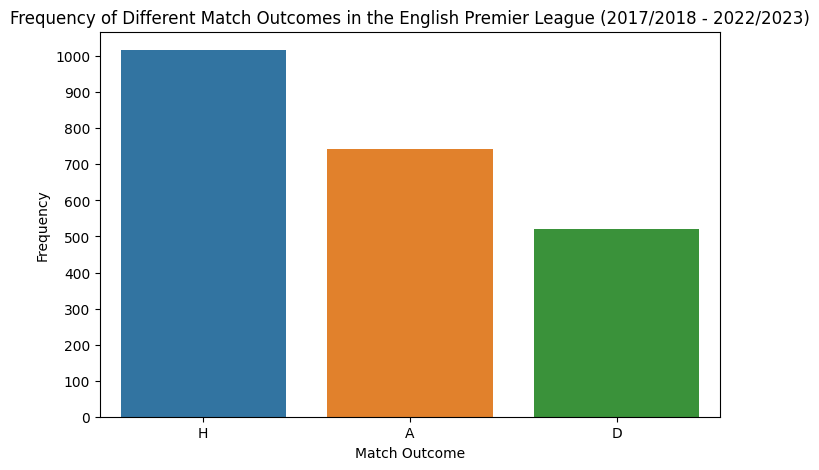

In [538]:
# Compare the frequency of the different results in the English Premier League across all seasons of data
plt.figure(figsize=(8, 5))

# Create our bar plot
bar_plot = sns.barplot(
    x = match_df['FTR'].value_counts().index,
    y = match_df['FTR'].value_counts().values,
    hue = match_df['FTR'].value_counts().index
)

# Change the y ticks so we can see the values better
bar_plot.set_yticks(np.arange(0, 1100, 100))

# Set the title and axis labels
bar_plot.set_title('Frequency of Different Match Outcomes in the English Premier League (2017/2018 - 2022/2023)')
bar_plot.set_xlabel('Match Outcome')
bar_plot.set_ylabel('Frequency')

# Display the plot to the screen
plt.show()

C:\Users\Mathews\AppData\Local\Temp\ipykernel_14364\2742686126.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45)


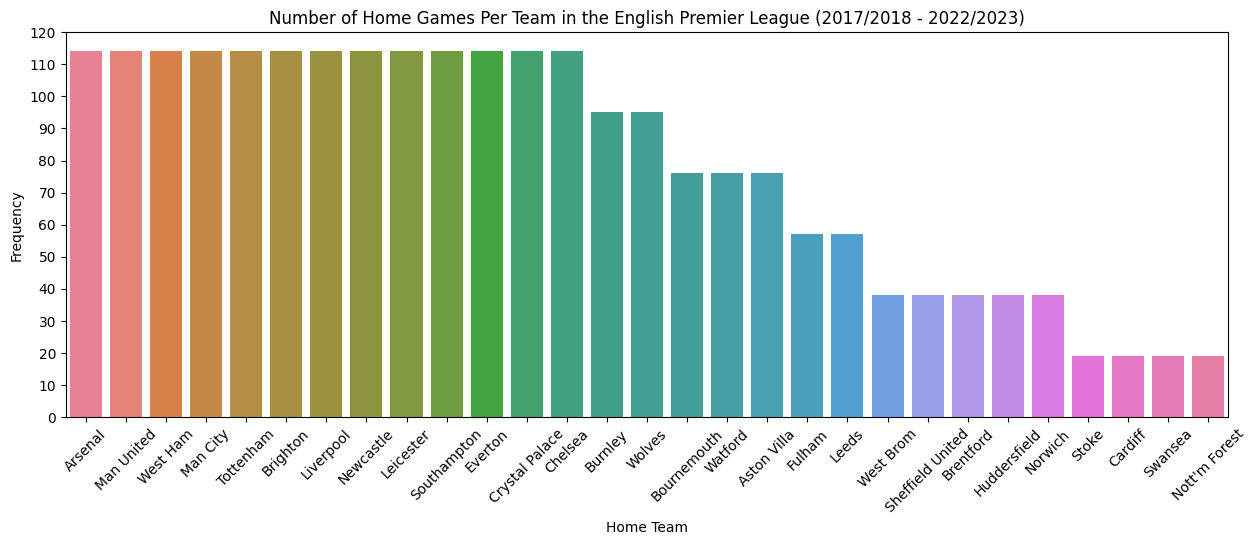

In [539]:
# Find teams with most home games
plt.figure(figsize=(15, 5))
                            
# Create our bar plot
bar_plot = sns.barplot(
    x = match_df['HomeTeam'].value_counts().index,
    y = match_df['HomeTeam'].value_counts().values,
    hue = match_df['HomeTeam'].value_counts().index
)

# Rotate x-axis labels
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45)

# Change the y ticks so we can see the values better
bar_plot.set_yticks(np.arange(0, 130, 10))

# Set the title and axis labels
bar_plot.set_title('Number of Home Games Per Team in the English Premier League (2017/2018 - 2022/2023)')
bar_plot.set_xlabel('Home Team')
bar_plot.set_ylabel('Frequency')

# Display the plot to the screen
plt.show()

In [540]:
# Find number of wins, draws and losses for each team

# Create a new data frame with the home team wins, draws and losses
home_team_wins = match_df[match_df['FTR'] == 'H'].groupby('HomeTeam').size().reset_index(name='HomeTeamWins')
home_team_draws = match_df[match_df['FTR'] == 'D'].groupby('HomeTeam').size().reset_index(name='HomeTeamDraws')
home_team_losses = match_df[match_df['FTR'] == 'A'].groupby('HomeTeam').size().reset_index(name='HomeTeamLosses')

# Merge the home team wins, draws and losses data frames
home_team_results = pd.merge(home_team_wins, home_team_draws, how='left', left_on=['HomeTeam'], right_on=['HomeTeam'])
home_team_results = pd.merge(home_team_results, home_team_losses, how='left', left_on=['HomeTeam'], right_on=['HomeTeam'])

# Create a new data frame with the away team wins, draws and losses
away_team_wins = match_df[match_df['FTR'] == 'A'].groupby('AwayTeam').size().reset_index(name='AwayTeamWins')
away_team_draws = match_df[match_df['FTR'] == 'D'].groupby('AwayTeam').size().reset_index(name='AwayTeamDraws')
away_team_losses = match_df[match_df['FTR'] == 'H'].groupby('AwayTeam').size().reset_index(name='AwayTeamLosses')

# Merge the away team wins, draws and losses data frames
away_team_results = pd.merge(away_team_wins, away_team_draws, how='left', left_on=['AwayTeam'], right_on=['AwayTeam'])
away_team_results = pd.merge(away_team_results, away_team_losses, how='left', left_on=['AwayTeam'], right_on=['AwayTeam'])

# Merge the home and away team results data frames
team_results = pd.merge(home_team_results, away_team_results, how='left', left_on=['HomeTeam'], right_on=['AwayTeam'])

# Drop the extra 'AwayTeam' column
team_results = team_results.drop('AwayTeam', axis=1)

# Rename the columns
team_results = team_results.rename(columns={'HomeTeam': 'Team'})

# Merge the home and away results into one column for win, loss and draw
team_results['Wins'] = team_results['HomeTeamWins'] + team_results['AwayTeamWins']
team_results['Draw'] = team_results['HomeTeamDraws'] + team_results['AwayTeamDraws']
team_results['Losses'] = team_results['HomeTeamLosses'] + team_results['AwayTeamLosses']

# Drop the extra columns
team_results = team_results.drop(['HomeTeamWins', 'HomeTeamDraws', 'HomeTeamLosses', 'AwayTeamWins', 'AwayTeamDraws', 'AwayTeamLosses'], axis=1)

# Sort by the total number of wins
team_results = team_results.sort_values(by=['Wins'], ascending=False)

# Show results to screen
team_results.head(50).reset_index(drop=True)

,Team,Wins,Draw,Losses
0,Man City,174,25,29
1,Liverpool,150,49,29
2,Man United,122,54,52
3,Tottenham,120,40,68
4,Arsenal,120,43,65
5,Chelsea,113,54,61
6,Leicester,88,49,91
7,West Ham,81,51,96
8,Newcastle,79,61,88
9,Everton,77,55,96


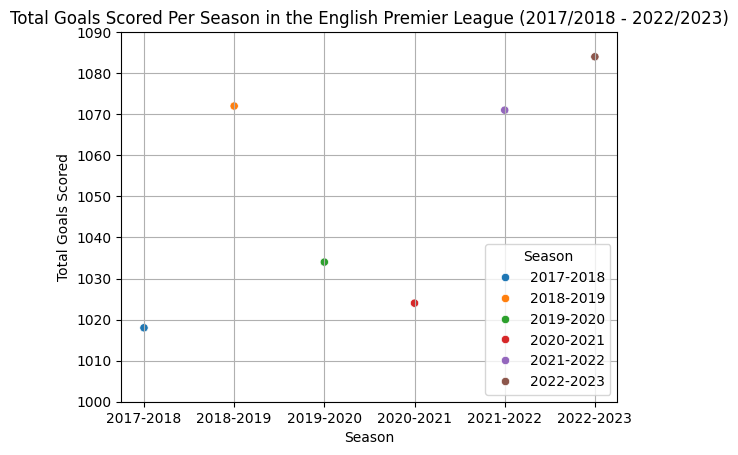

In [541]:
# Find the number of goals scored by season

# create a new data frame with the just the columns we need
goals_per_season = match_df.loc[:, ['FTHG', 'FTAG', 'Season']].groupby('Season').sum()


scatter_plot = sns.scatterplot(
    x = goals_per_season.index,
    y = goals_per_season['FTHG'] + goals_per_season['FTAG'],
    hue = goals_per_season.index
)

# Set the title and axis labels
scatter_plot.set_title('Total Goals Scored Per Season in the English Premier League (2017/2018 - 2022/2023)')
scatter_plot.set_ylabel('Total Goals Scored')

# Change the y ticks so we can see the values better
scatter_plot.set_yticks(np.arange(1000, 1100, 10))

# Add Grid lines
scatter_plot.grid(True)

# Display the plot to the screen
plt.show()


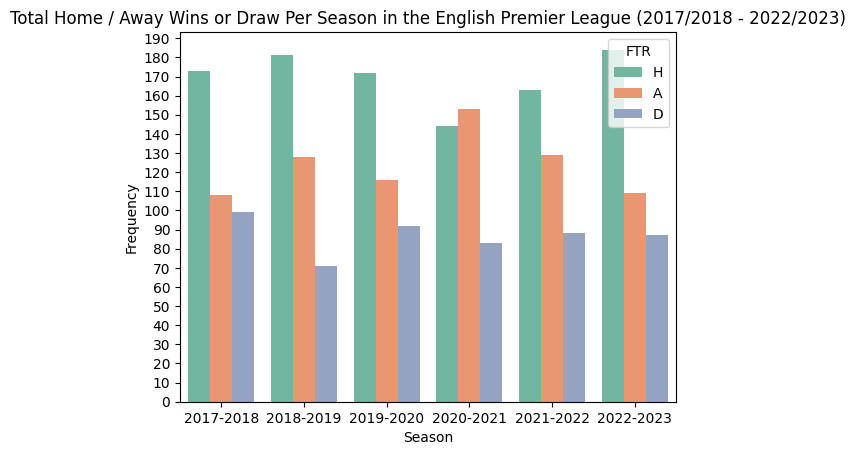

In [542]:
# Find the number of home / away / draw wins by season (as generally home team support will have a positive effect on the home team)

# Create a new data frame with the total home wins and away and draw wins by season
home_away_wins = match_df.loc[:, ['FTR', 'Season']].groupby(['Season'])["FTR"].value_counts().reset_index()
# Create a grouped bar chart
gbar_plot = sns.barplot(
    x = home_away_wins['Season'],
    y = home_away_wins['count'],
    hue = home_away_wins['FTR'],
    palette = "Set2"
)

# Change the y ticks so we can see the values better
gbar_plot.set_yticks(np.arange(0, 200, 10))

# Set the title and axis labels
gbar_plot.set_title('Total Home / Away Wins or Draw Per Season in the English Premier League (2017/2018 - 2022/2023)')
gbar_plot.set_ylabel('Frequency')

# Display the plot to the screen
plt.show()


#### Preprocessing

In [543]:
# Converting match date to day of the week
match_df["matchDate"] = pd.to_datetime(match_df["Date"])
match_df['matchDay'] = match_df['matchDate'].dt.day_name()

# Drop the extra columns with little to no relevance to our analysis
match_df.drop('Date', axis=1, inplace=True)
match_df.drop('matchDate', axis=1, inplace=True)

# Convert our text columns to numerical as we cannot use text data in our model using One Hot Encoding
match_df = pd.get_dummies(match_df, columns=['HomeTeam'], prefix = ['HomeTeam'], dtype = int)
match_df = pd.get_dummies(match_df, columns=['AwayTeam'], prefix = ['AwayTeam'], dtype = int)
match_df = pd.get_dummies(match_df, columns=['HTR'], prefix = ['HTR'], dtype = int)
match_df = pd.get_dummies(match_df, columns=['matchDay'], prefix = ['matchDay'], dtype = int)
match_df = pd.get_dummies(match_df, columns=['Season'], prefix = ['Season'], dtype = int)
match_df = pd.get_dummies(match_df, columns=['Referee'], prefix = ['Referee'], dtype = int)

match_df.head()

,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,home_rating_overall,away_rating_overall,HomeTeam_Arsenal,HomeTeam_Aston Villa,HomeTeam_Bournemouth,HomeTeam_Brentford,HomeTeam_Brighton,HomeTeam_Burnley,HomeTeam_Cardiff,HomeTeam_Chelsea,HomeTeam_Crystal Palace,HomeTeam_Everton,HomeTeam_Fulham,HomeTeam_Huddersfield,HomeTeam_Leeds,HomeTeam_Leicester,HomeTeam_Liverpool,HomeTeam_Man City,HomeTeam_Man United,HomeTeam_Newcastle,HomeTeam_Norwich,HomeTeam_Nott'm Forest,HomeTeam_Sheffield United,HomeTeam_Southampton,HomeTeam_Stoke,HomeTeam_Swansea,HomeTeam_Tottenham,HomeTeam_Watford,HomeTeam_West Brom,HomeTeam_West Ham,HomeTeam_Wolves,AwayTeam_Arsenal,AwayTeam_Aston Villa,AwayTeam_Bournemouth,AwayTeam_Brentford,AwayTeam_Brighton,AwayTeam_Burnley,AwayTeam_Cardiff,AwayTeam_Chelsea,AwayTeam_Crystal Palace,AwayTeam_Everton,AwayTeam_Fulham,AwayTeam_Huddersfield,AwayTeam_Leeds,AwayTeam_Leicester,AwayTeam_Liverpool,AwayTeam_Man City,AwayTeam_Man United,AwayTeam_Newcastle,AwayTeam_Norwich,AwayTeam_Nott'm Forest,AwayTeam_Sheffield United,AwayTeam_Southampton,AwayTeam_Stoke,AwayTeam_Swansea,AwayTeam_Tottenham,AwayTeam_Watford,AwayTeam_West Brom,AwayTeam_West Ham,AwayTeam_Wolves,HTR_A,HTR_D,HTR_H,matchDay_Friday,matchDay_Monday,matchDay_Saturday,matchDay_Sunday,matchDay_Thursday,matchDay_Tuesday,matchDay_Wednesday,Season_2017-2018,Season_2018-2019,Season_2019-2020,Season_2020-2021,Season_2021-2022,Season_2022-2023,Referee_A Madley,Referee_A Marriner,Referee_A Moss,Referee_A Taylor,Referee_C Kavanagh,Referee_C Pawson,Referee_D Bond,Referee_D Coote,Referee_D England,Referee_G Scott,Referee_J Brooks,Referee_J Gillett,Referee_J Moss,Referee_J Smith,Referee_K Friend,Referee_L Mason,Referee_L Probert,Referee_M Atkinson,Referee_M Dean,Referee_M Jones,Referee_M Oliver,Referee_M Salisbury,Referee_N Swarbrick,Referee_O Langford,Referee_P Bankes,Referee_P Tierney,Referee_R East,Referee_R Jones,Referee_R Madley,Referee_S Attwell,Referee_S Hooper,Referee_S Scott,Referee_T Bramall,Referee_T Harrington,Referee_T Robinson
0,4,3,H,2,2,27,6,10,3,9,12,9,4,0,1,0,0,82,78,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,2,A,0,0,6,14,2,4,6,9,3,10,0,2,0,0,75,84,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,3,A,0,3,19,10,6,5,16,11,8,5,3,3,2,0,83,77,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,3,A,0,2,14,8,4,6,7,19,12,9,1,3,0,0,76,74,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,H,1,0,9,9,4,1,13,10,6,7,1,1,0,0,79,76,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [544]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit the encoder to the dependent variable
match_df['FTR'] = label_encoder.fit_transform(match_df['FTR']) 

# Have a look at our data frame
print('Unique values for our label are: ', match_df['FTR'].unique())
print('if the home team wins the label is ', match_df['FTR'][0])
print('if the away team wins the label is ', match_df['FTR'][2])
print('if there is a tie the label is ', match_df['FTR'][5])

label = match_df['FTR']

print('the result for the match in row 149 is ', label[149])

match_df.shape

Unique values for our label are:  [2 0 1]
if the home team wins the label is  2
if the away team wins the label is  0
if there is a tie the label is  1
the result for the match in row 149 is  2


(2280, 128)

In [545]:
# Perform feature selection to see which features are most important for predicting the match outcome

# Classification Feature Selection:
# https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
# (Numerical Input, Categorical Output) < --- TRY THIS OUT on the link above





X = match_df.loc[:, match_df.columns != 'FTR']
y = match_df['FTR']


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=50)
fit = bestfeatures.fit(X, y)

# Summarize scores
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']

# Print the top 10 features
print(featureScores.nlargest(50, 'Score'))


                        Specs        Score
1                        FTAG  1225.234069
0                        FTHG  1166.509256
6                         HST   650.169772
7                         AST   635.692493
3                        HTAG   529.175754
2                        HTHG   472.812181
76                      HTR_A   464.900961
5                          AS   448.513589
78                      HTR_H   413.877401
4                          HS   387.518833
77                      HTR_D    75.059516
62          AwayTeam_Man City    74.492398
33          HomeTeam_Man City    66.138429
32         HomeTeam_Liverpool    48.018924
10                         HC    42.401645
12                         HY    37.371163
61         AwayTeam_Liverpool    37.284782
14                         HR    36.471969
16        home_rating_overall    34.881333
17        away_rating_overall    29.185357
11                         AC    23.231667
18           HomeTeam_Arsenal    19.841058
36         

In [546]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree

# Assign our target variable to label
label = match_df['FTR']

# Flatten the label array
y = label

# Assign all columns expect the FTR column to the features variable
X = match_df.loc[:, match_df.columns != 'FTR']

# Split our data into training and testing sets
# We set shuffle to false as we want to keep the order of the matches in the data frame so we can use the 2022/2023 season as our test set
# Use a test size of 0.1665 as this will give us 380 test samples which is the same as the number of matches in a season
# https://stats.stackexchange.com/questions/550399/what-is-the-role-of-shuffle-in-train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1665, random_state=0, shuffle=False)

# confirm the test set has only the 2022/2023 season
print(f"Value count of test set:\n {X_test['Season_2022-2023'].value_counts()}\n")

# Print out the shape of each set
print("The shape of X_train is " + str(X_train.shape))
print("The size of y_train is " + str(y_train.shape))
print("The size of X_test set is " + str(X_test.shape))
print("The size of y_test is " + str(y_test.shape))

# Initialize and train the SVM model
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Value count of test set:
 Season_2022-2023
1    380
Name: count, dtype: int64

The shape of X_train is (1900, 127)
The size of y_train is (1900,)
The size of X_test set is (380, 127)
The size of y_test is (380,)
Accuracy: 0.9973684210526316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      0.99      0.99        87
           2       0.99      1.00      1.00       184

    accuracy                           1.00       380
   macro avg       1.00      1.00      1.00       380
weighted avg       1.00      1.00      1.00       380



In [547]:
# MORE TESTING
#
#
# TODO :
# Feature Selection
# Standardization / Normalization (test with and without)
# Find the optimal K Fold for cross validation (KFold / StratifiedKFold) (not repeatedKFold: https://neptune.ai/blog/cross-validation-in-machine-learning-how-to-do-it-right)
# https://pyimagesearch.com/2021/05/17/introduction-to-hyperparameter-tuning-with-scikit-learn-and-python/
# Try different scoring metrics (accuracy, precision, recall, f1-score)
# Try bagging and boosting 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, GridSearchCV


# Try with out without standardization / normalization also try min max scaler
# Standardize the data set as we have a several features with different data scales
scaler = StandardScaler()                              

# Fit the scaler to the training set and transform the training set
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




# Linear SVM kernel achieved the highest accuracy of almost 100%
clf = [SVC(), KNeighborsClassifier(), tree.DecisionTreeClassifier(), GaussianNB()]

labels = ['SVM', 'KNN', "Decision Tree", "Naive Bayes"]

mean_scores = []

for i in range(0,4):

    clf[i].fit(X_train, y_train)

    scores = cross_val_score(clf[i], X_train, y_train, cv=10)
    print(labels[i]," : ", scores.mean())
    
    mean_scores.append(scores.mean())
    
    
    
    
# Create SVM model
svm_model = SVC(random_state=0)

# Create Decision Tree model
dt_model = tree.DecisionTreeClassifier(random_state=0)

# Create KNN model
knn_model = KNeighborsClassifier()

# Create Naive Bayes model
nb_model = GaussianNB()

# Perform hyper parameter tuning on each model using grid search
# Create a dictionary of hyper parameters for each model we want to tune
svm_parameters = {'kernel':['poly', 'rbf', 'linear'], 'C':[0.1, 1, 10, 100], 'gamma':['scale', 'auto', 0.1, 1], 'degree':list(range(1, 10))}
dt_parameters = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random'], 'max_depth':list(range(1,200))}

# For knn neighbor param, we make sure it is odd to prevent ties
knn_parameters = {'n_neighbors':[i for i in range(2, 31) if i % 2 != 0], 'weights':['uniform', 'distance'], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'leaf_size':[i for i in range(1, 40)], 'p':[1, 2], 'metric':['minkowski', 'euclidean', 'manhattan']}

nb_parameters = {'var_smoothing':[1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}

# Create a dictionary of the models
models = {'Decision_Tree':dt_model, 'KNN':knn_model, 'SVM':svm_model, 'Naive_Bayes':nb_model}

# Create a dictionary of the parameters
parameters = {'SVM':svm_parameters, 'Decision_Tree':dt_parameters, 'KNN':knn_parameters, 'Naive_Bayes':nb_parameters}

# Create the StratifiedKFold object
skf = StratifiedKFold(n_splits=10)



# import scoring metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import make_scorer
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}


"""
# Loop through each model and perform hyper parameter tuning
for model_name, model in models.items():
    print(f"Performing hyper parameter tuning on {model_name}...")
    
    # Create a grid search object and fit it to the data to perform hyper parameter tuning
    search = GridSearchCV(estimator=model, param_grid=parameters[model_name], scoring=scoring, refit='accuracy', cv=skf, n_jobs=-1)
    
    # Fit the grid search object to the train data
    searchResults = search.fit(X_train, y_train)
    
    # Get the optimal hyper parameters and corresponding accuracy score
    print(f"Best parameters: {search.best_params_}, Best Score: {search.best_score_}")
    
    print("Evaluating the model on the test data...")
    bestModel = searchResults.best_estimator_
    print(bestModel)
    print(f"Test Score: {bestModel.score(X_test, y_test)}\n\n")
    
    # Fit the best parameters to the model
    model.set_params(**search.best_params_)
    
# Display the parameters for each model
print(f"\nDecision Tree parameters: {dt_model.get_params()}")
print(f"KNN parameters: {knn_model.get_params()}")
print(f"SVM parameters: {svm_model.get_params()}")
print(f"Naive Bayes parameters: {nb_model.get_params()}")
"""

SVM  :  0.7805263157894737
KNN  :  0.5647368421052632
Decision Tree  :  0.9994736842105263
Naive Bayes  :  0.5531578947368422


'\n# Loop through each model and perform hyper parameter tuning\nfor model_name, model in models.items():\n    print(f"Performing hyper parameter tuning on {model_name}...")\n    \n    # Create a grid search object and fit it to the data to perform hyper parameter tuning\n    search = GridSearchCV(estimator=model, param_grid=parameters[model_name], scoring=scoring, refit=\'accuracy\', cv=skf, n_jobs=-1)\n    \n    # Fit the grid search object to the train data\n    searchResults = search.fit(X_train, y_train)\n    \n    # Get the optimal hyper parameters and corresponding accuracy score\n    print(f"Best parameters: {search.best_params_}, Best Score: {search.best_score_}")\n    \n    print("Evaluating the model on the test data...")\n    bestModel = searchResults.best_estimator_\n    print(bestModel)\n    print(f"Test Score: {bestModel.score(X_test, y_test)}\n\n")\n    \n    # Fit the best parameters to the model\n    model.set_params(**search.best_params_)\n    \n# Display the paramet

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 100)               12800     
                                                                 
 dropout_40 (Dropout)        (None, 100)               0         
                                                                 
 dense_61 (Dense)            (None, 50)                5050      
                                                                 
 dropout_41 (Dropout)        (None, 50)                0         
                                                                 
 dense_62 (Dense)            (None, 3)                 153       
                                                                 
Total params: 18003 (70.32 KB)
Trainable params: 18003 (70.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
27/27 [==============================] - 1s 7ms/step - loss: 1.0927 - accuracy: 0.4678 - precision: 0.5183 - recall: 0.3316 - val_loss: 0.8789 - val_accuracy: 0.6263 - val_precision: 0.7364 - val_recall: 0.5000
Epoch 2/50
27/27 [==============================] - 0s 2ms/step - loss: 0.8069 - accuracy: 0.6462 - precision: 0.7382 - recall: 0.5310 - val_loss: 0.7368 - val_accuracy: 0.6789 - val_precision: 0.7778 - val_recall: 0.5526
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.7012 - precision: 0.7722 - recall: 0.6006 - val_loss: 0.6387 - val_accuracy: 0.7158 - val_precision: 0.8082 - val_recall: 0.6211
Epoch 4/50
27/27 [==============================] - 0s 8ms/step - loss: 0.5801 - accuracy: 0.7444 - precision: 0.8058 - recall: 0.6696 - val_loss: 0.5783 - val_accuracy: 0.7579 - val_precision: 0.8129 - val_recall: 0.6632
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.7784 - precision: 0

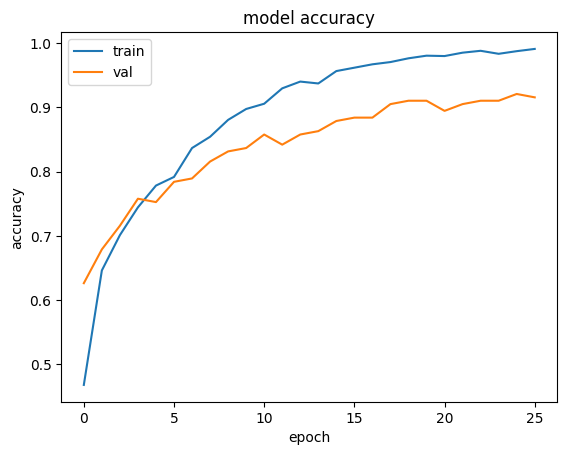

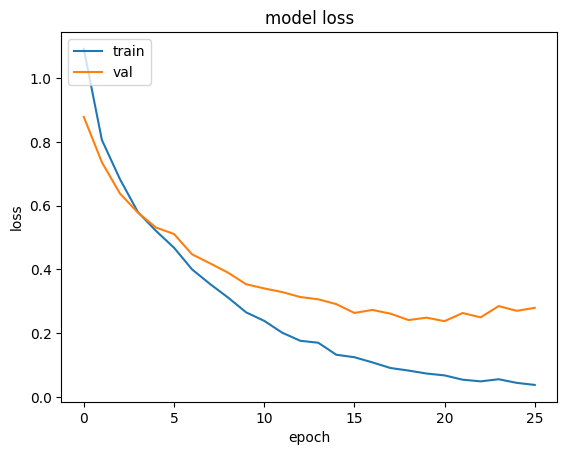

In [548]:
import tensorflow as tf

#one hot-encoding y_train and y_test
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

# create a model with 2 hidden layers using the traing and test data
# https://stackoverflow.com/questions/47892505/dropout-rate-guidance-for-hidden-layers-in-a-convolution-neural-network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(100, input_dim=127, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(loss = 'categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall'], optimizer='adam')


from tensorflow.keras.callbacks import EarlyStopping
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


# https://stackoverflow.com/questions/51768594/tensorflow-on-what-does-the-batch-size-depend
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.1, callbacks=[early_stopping])

# How to interpret the loss and accuracy values from the history object
# https://stackoverflow.com/questions/51704808/what-is-the-difference-between-loss-accuracy-validation-loss-validation-accur

# Plot accuracy history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot loss history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [549]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

 1/12 [=>............................] - ETA: 0s - loss: 0.3231 - accuracy: 0.9375 - precision: 0.9375 - recall: 0.9375

12/12 [==============================] - 0s 909us/step - loss: 0.5980 - accuracy: 0.8553 - precision: 0.8553 - recall: 0.8553
Test Score: 0.5980199575424194
Test Accuracy: 0.8552631735801697
